In [9]:
import torch
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt

In [10]:
words = open('data/names.txt', 'r').read().splitlines()

In [11]:
# create lookup tables for string to index and index to string
chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [12]:
# create the training set of bigrams (x,y)
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
xenc = F.one_hot(xs, num_classes=27).float()
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

number of examples:  228146


In [13]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l = nn.Linear(27, 27)
    def forward(self, x):
        out = self.l(x)
        return out

In [14]:
model = NN()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10, weight_decay=1e-2)
losses = []

In [15]:
for i in range(100):
    outs = model.forward(xenc)
    loss = loss_function(outs, ys)
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 10 == 0: print(loss.item())

3.307046890258789
2.7269673347473145
2.7044451236724854
2.700035572052002
2.699021577835083
2.69877028465271
2.698704242706299
2.698686361312866
2.698681592941284
2.6986801624298096


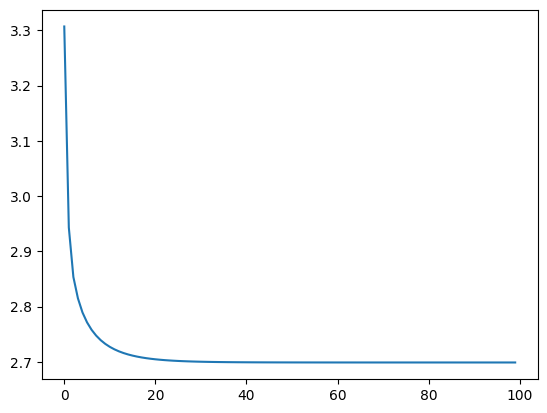

In [16]:
plt.plot(losses)